In [2]:
import glob
from keras.models import Sequential, load_model
import numpy as np
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import keras as k
import tensorflow as tf

In [13]:
# Loading the Data
import pandas as pd
dataset = pd.read_csv("Csp3.csv")
dataset

,Symptom 1,Symptom 2,Intensity,Duration,Time,Age,Sex,Disease
0,Fever,Headache,High,5,Night,17,Male,Malaria
1,Fever,Vomiting,High,2,Night,20,Male,Malaria
2,Fatigue,Headache,High,3,Night,19,Female,Malaria
3,Fever,Headache,Low,7,Night,10,Female,Malaria
4,Fever,Vomiting,High,4,Morning,25,Male,Malaria
...,...,...,...,...,...,...,...,...
70,Fever,Headache,Low,9,Morning,56,Male,Hepatitis
71,Fever,Dark Urine,Low,13,All Day,30,Female,Hepatitis
72,Fever,Stomach Pain,High,1,Night,45,Female,Hepatitis
73,Fever,Dark Urine,High,1,Night,63,Male,Hepatitis


In [16]:
import numpy as np
for column in dataset.columns:
    if dataset[column].dtype == np.number:
        continue
    dataset[column] = LabelEncoder().fit_transform(dataset[column])

<ipython-input-16-f94c640b6235>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset[column].dtype == np.number:


In [4]:
columns_to_retain = ['Symptom 1','Symptom 2','Intensity','Duration','Time','Disease']
dataset = dataset.drop([col for col in dataset.columns if not col in columns_to_retain], axis =1)

In [17]:
dataset

,Symptom 1,Symptom 2,Intensity,Duration,Time,Age,Sex,Disease
0,4,3,0,4,2,8,1,2
1,4,8,0,1,2,11,1,2
2,3,3,0,2,2,10,0,2
3,4,3,1,6,2,2,0,2
4,4,8,0,3,1,15,1,2
...,...,...,...,...,...,...,...,...
70,4,3,1,8,1,36,1,1
71,4,0,1,12,0,20,0,1
72,4,7,0,0,2,30,0,1
73,4,0,0,0,2,42,1,1


In [7]:
x = dataset.drop(['Disease'], axis =1)
y = dataset['Disease']

In [8]:
#Split the model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle=True)

In [42]:
model = Sequential()
model.add(Dense(12,input_dim =len(x.columns),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [43]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
#model.compile(optimizer='sgd', loss='mse', metrics=[tf.keras.metrics.CategoricalCrossentropy()])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history = model.fit(x_train, y_train, epochs = 50 )
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
2/2 [==============================] - 0s 0s/step - loss: 0.0000e+00 - accuracy: 0.2819
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2729
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3250
Epoch 4/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3146
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3681
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3792
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4132
Epoch 8/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4146
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4667
Epoch 10/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4667


In [45]:
model.save("healthcare.h5")

Text(0.5, 0, 'epoch')

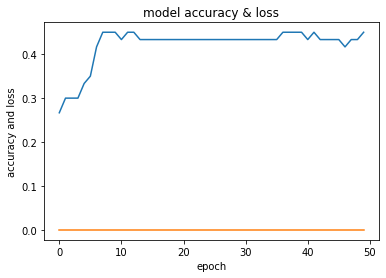

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [47]:
pred = model.predict(x_test)
pred = ['Hepatitis' if  y>=0.5 else 'Diabetes' for y in pred]
pred

['Diabetes',
 'Hepatitis',
 'Diabetes',
 'Hepatitis',
 'Diabetes',
 'Hepatitis',
 'Diabetes',
 'Hepatitis',
 'Diabetes',
 'Hepatitis',
 'Hepatitis',
 'Hepatitis',
 'Diabetes',
 'Diabetes',
 'Hepatitis']